# 4. Learning Curve

Learning curve is another method for evaluating performance of model.(Overrfitting? Underfitting?)

## Create Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
np.random_state = 42

m = 100
X = 6* np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [2]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='Training Set')
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Dev Set")

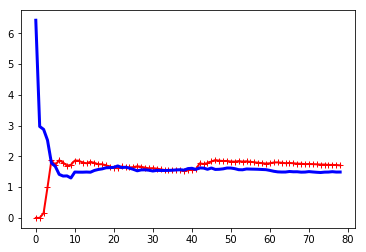

In [3]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

## High Bias

- High bias model have to be more complex model. 
- Feeding more training sample doesn't work

**Blue line** means RMSE of dev set as training set increase, and **Red line** is of training set.

Obviously, Error of training set is getting higher as it uses more data, because every samples has noise.

This graph is typical one which is underfitting. Performance is low (Error is high)

In [4]:
from sklearn.preprocessing import PolynomialFeatures

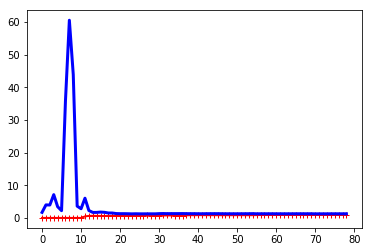

In [5]:
poly_features = PolynomialFeatures(degree=10, include_bias = False)
X_poly = poly_features.fit_transform(X)

plot_learning_curves(lin_reg, X_poly, y)

## High Variance

- High variance model have to be feed more data. 
- It is caused since it is sensitive to small change, and it has high degree of freedom

Between Bias and Variance, there is tradeoff.